

---
**Task-4 Email spam Detection with Machine Learning**


---

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.


In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("/content/spam.csv", encoding="latin-1")


df = df[['v1', 'v2']]
df.columns = ['label', 'message']



In [4]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


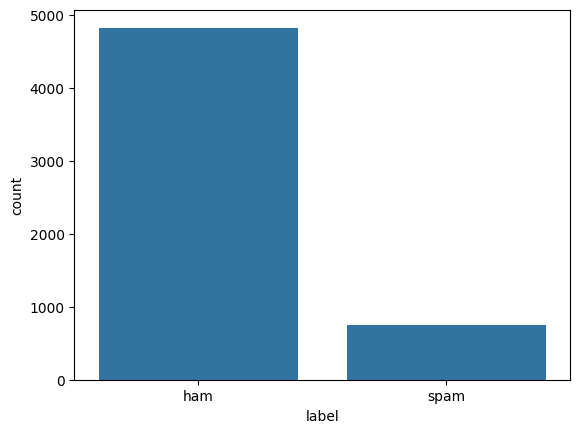

In [8]:
sns.countplot(x='label', data=df)
plt.show()


In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(
    df['message'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)



In [9]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.9
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [10]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [11]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.968609865470852

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:

[[966   0]
 [ 35 114]]


In [12]:
sample_email = ["Congratulations! You have won a free prize. Click now"]
sample_vector = vectorizer.transform(sample_email)
prediction = model.predict(sample_vector)

print("\nSample Email Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")


Sample Email Prediction: Spam
